In [25]:
import pandas as pd
import numpy  as np
import matplotlib as plt

In [26]:
df = pd.read_csv('./Teste-11-08.csv')

/home/luan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
#df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','l1_cache_used','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size', 'duration','grid_x','grid_y','block_x','block_y']]
df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size', 'duration','grid_x','grid_y','block_x','block_y']]

df1 = df1.sort_values(by='AppId', ascending=True)
df1['duration'] = pd.to_numeric(df1['duration'],errors = 'coerce')
df1 = df1.select_dtypes(exclude=['object'])
df1=df1.dropna()

In [16]:
#sub_df = df1[(df1['AppId'] != 1) & (df1['AppId'] != 4)][['compute_version','registers','smem','cmem','gpu_id','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size', 'duration','grid_x','grid_y','block_x','block_y']]
#df1.describe()
#df1.isnull().sum()

<AxesSubplot:>

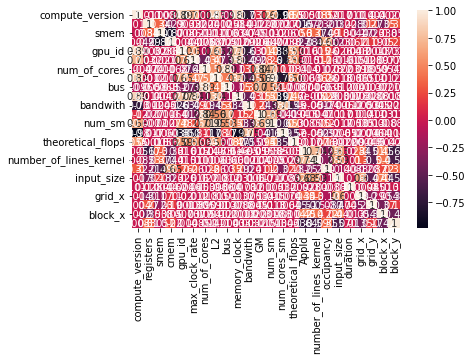

In [29]:
import seaborn as sns
sns.heatmap(df1.corr(), annot=True)

In [4]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

for idApp in range(1,10):
  idApp = float(idApp)
  
  X_train = df1[df1['AppId'] != idApp].values
  Y_train = df1[df1['AppId'] != idApp]['duration'].values
  X_test = df1[df1['AppId'] == idApp]
  Y_test = df1[df1['AppId'] == idApp]['duration']
  
  yTrain = np.log(Y_train + 0.000001)
  yTest = np.log(Y_test + 0.000001)
  #xTrain = X_train
  #xTest = X_test
  xTrain = np.log(X_train + 0.000001)
  xTest = np.log(X_test + 0.000001)

  #regressor = RandomForestRegressor(n_estimators = 500, random_state =42)
  #regressor = LinearRegression().fit(xTrain, yTrain)
  regressor = linear_model.LinearRegression().fit(xTrain, yTrain)
  #regressor.fit(xTrain, yTrain)

  y_pred = regressor.predict(xTest)
  #print(regressor.score())

  df2=pd.DataFrame({'Actual':yTest, 'Predicted':y_pred})
  print('Application: ', idApp, ' Percentage:',mean_absolute_percentage_error(yTest, y_pred))
  

Application:  1.0  Percentage: 1.076755392033147e-12
Application:  2.0  Percentage: 6.990417935795722e-13
Application:  3.0  Percentage: 7.389625446771019e-13
Application:  4.0  Percentage: 7.605437193347199e-12
Application:  5.0  Percentage: 3.490463525686231e-14
Application:  6.0  Percentage: 9.697193054521485e-14
Application:  7.0  Percentage: 1.542338123501403e-13
Application:  8.0  Percentage: 5.452118542772235e-13
Application:  9.0  Percentage: 8.160691355176515e-06


100:
Application:  1.0  Percentage: 2.4568160831735066
Application:  2.0  Percentage: 0.35518768529248285
Application:  3.0  Percentage: 0.5822789950166065
Application:  4.0  Percentage: 7.949959177626566
Application:  5.0  Percentage: 0.03537103201123657
Application:  6.0  Percentage: 0.047906109856315174
Application:  7.0  Percentage: 0.030826298896368093
Application:  8.0  Percentage: 0.025104629924483625
Application:  9.0  Percentage: 0.16431058776644525